<a href="https://colab.research.google.com/github/gnganesh99/DKL_on_STM/blob/main/Analyze_DKL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sidpy


import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import sidpy


In [ ]:
!pip install -U gdown

# Download data


!gdown https://drive.google.com/uc?id=12TqFGsstZIn7M176eVAPl-FE6o3ge5Xp

Functions

In [12]:
class DKL_File():
    def __init__(self, hfile):
        self.hfile = hfile

    def dkl_dataset(self):
        dataset = self.hfile["Measurement_000/Tunneling Spectroscopy/Tunneling Spectroscopy/Tunneling Spectroscopy"]
        dataset = np.asarray(dataset)
        return dataset

    def dkl_spectrum(self, iter):
        dataset = self.hfile["Measurement_000/Tunneling Spectroscopy/Tunneling Spectroscopy/Tunneling Spectroscopy"]
        dataset = np.asarray(dataset)
        return dataset[iter-1]

    def stm_image(self):
        ds_image = self.hfile["Measurement_001/STM Image/Image/Image"]
        return np.asarray(ds_image)

    def dkl_position(self, iter):
        ds_position = self.hfile["Metadata_000/DKL Position/Position/Position"]
        return ds_position[iter -1]

    def dkl_scalar(self, iter):
        ds_scalar = self.hfile["Metadata_001/DKL Scalar/Scalar/Scalar"]
        return ds_scalar[iter-1]


Load data

In [4]:
input_file_path = r"/content/Figure3_large_area_250nm.hf5"


In [9]:
hf = h5py.File(input_file_path, 'r+')
sidpy.hdf_utils.print_tree(hf)

#hf.close()

/
├ Measurement_000
  ---------------
  ├ Tunneling Spectroscopy
    ----------------------
    ├ Tunneling Spectroscopy
      ----------------------
      ├ DKL_iteration
      ├ Spectroscpy_Channel
      ├ Spectroscpy_Sweep
      ├ Tunneling Spectroscopy
├ Measurement_001
  ---------------
  ├ STM Image
    ---------
    ├ Image
      -----
      ├ Image
      ├ a
      ├ b
├ Metadata_000
  ------------
  ├ DKL Position
    ------------
    ├ Position
      --------
      ├ Position
      ├ a
      ├ b
├ Metadata_001
  ------------
  ├ DKL Scalar
    ----------
    ├ Scalar
      ------
      ├ Scalar
      ├ a


DKL dataset

In [13]:
# create an object instance of the DKL file class for dataset analysis
expt1 = DKL_File(hf)

In [14]:
dataset = expt1.dkl_dataset()

dataset.shape

print(f"Dataset of {dataset.shape[0]} iterations, {dataset.shape[1]} channels and {dataset.shape[2]} points per spectrum")


Dataset of 267 iterations, 4 channels and 121 points per spectrum


Access Meta-data

In [15]:
# Choose experimental iteration for analysis
iteration = 25

print(f"DKL experiment at position: {expt1.dkl_position(iteration)} with a scalar value: {expt1.dkl_scalar(iteration)}")


DKL experiment at position: [200.1953125 234.375    ] with a scalar value: 9.067276882999463e-09


Plot DKL spectrum:

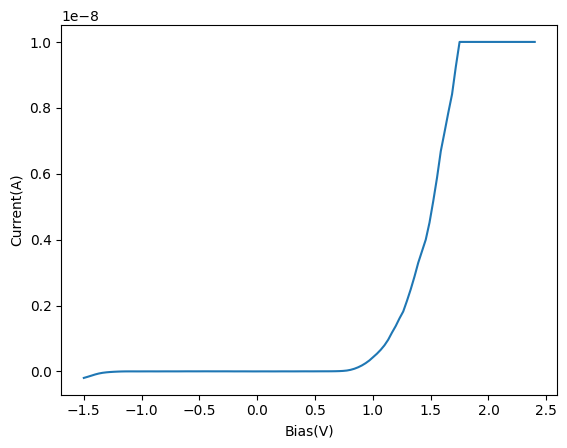

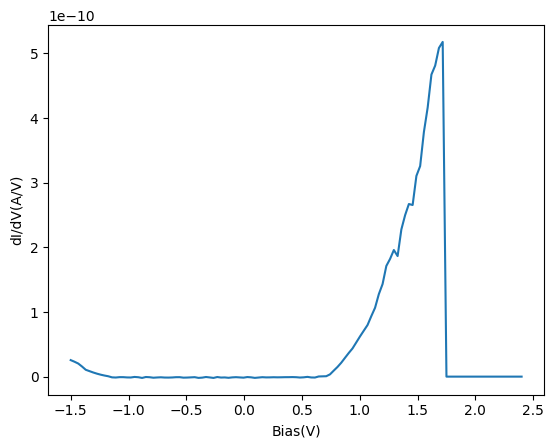

In [16]:
#Get spectrum for different channels

bias, current, didv, liy = expt1.dkl_spectrum(iteration)

plt.plot(bias, current)
plt.xlabel('Bias(V)')
plt.ylabel('Current(A)')
plt.show()


plt.plot(bias, didv)
plt.xlabel('Bias(V)')
plt.ylabel('dI/dV(A/V)')
plt.show()



Topographic image used for DKL implementation

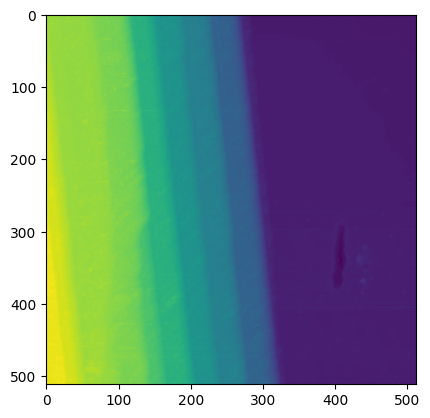

In [17]:
img = expt1.stm_image()
plt.imshow(img)


In [18]:
hf.close()